# Final Project Submission

* **Student name**: Sara Robinson
* **Student pace**: *self paced*/part time/full time
* **Scheduled project review date/time**: 9/7/2021 11:00
* **Instructor name**: Jeff Herman
* **Blog post URL**: https://medium.com/@sara.robinson27/classifying-a-tweets-sentiment-based-on-its-content-9835069aa2b3
* **Notebook**: 2/4

## Introduction

The purpose of this project is to build a model that can rate the sentiment of a tweet based on its content. The data is from CrowdFlower and contains over 9000 tweets about Apple and Google products rated by humans as either postive, negative, or neither.

This is the second notebook for the Phase 4 Final Project. This notebook picks up at preprocessing and continues with data exploration.


## Import Libraries

In the following cells I import the necessary libraries for this notebook.

In [1]:
import pandas as pd
import nltk
import re                                  
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
from nltk.collocations import *

## Load and Inspect Data

In the following cells I load in the dataset I cleaned up in the previous notebook, review it to make sure everything looks correct, then I make sure everything is formatted properly so I can start exploring the data.

In [2]:
df = pd.read_csv('CleanedDF.csv') #Read in dataset
df.head() #Print first 5 rows

Tweet             Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

    Emotion   Brand  Tweet Character Count                    Hashtag  \
0  Negative   Apple                    127  ['#RISE_Austin', '#SXSW']   
1  Positive   Apple                    139                  ['#SXSW']   
2  Positive   Apple                     79         ['#iPad', '#SXSW']   
3  Negative   Apple                     82                  ['#sxsw']   
4  Positive  Google                    131                  ['#SXSW']   

   Hashtag Count                                              Clean  \
0              2   i have a g iphone after hrs tweeting at risea...   
1              1   know about awesome ipadiphone app that youll ...   
2              2   can not wait for ipad also they should sale t...   
3              1   i hope this years festival isnt as crashy as ...   
4              1   great stuff on fri sxsw marissa mayer google ...   

   Clean Character Count                                       Clean Tokens  \
0                    104  ['i', 'have', 'g', 'iphone', 'after', 'hrs', '...   
1                    112  ['know', 'about', 'awesome', 'ipadiphone', 'ap...   
2                     61  ['can', 'not', 'wait', 'ipad', 'also', 'they',...   
3                     71  ['i', 'hope', 'years', 'festival', 'isnt', 'as...   
4                    103  ['great', 'stuff', 'fri', 'sxsw', 'marissa', '...   

   Clean Token Count                                       Tweet Tokens  \
0                 16  ['.', '@wesley83', 'I', 'have', 'a', '3G', 'iP...   
1                 15  ['@jessedee', 'Know', 'about', '@fludapp', '?'...   
2                 11  ['@swonderlin', 'Can', 'not', 'wait', 'for', '...   
3                 12  ['@sxsw', 'I', 'hope', 'this', "year's", 'fest...   
4                 14  ['@sxtxstate', 'great', 'stuff', 'on', 'Fri', ...   

   Tweet Token Count  
0                 29  
1                 26  
2                 17  
3                 16  
4                 27

# Exploratory Data Analysis (EDA)

Now that the tweets have been tokenized, let's get a better picture of the dataset as a whole. The EDA process includes visualizing the data a few different ways, as well as answering some questions that have come up as I've cleaned and perused through the dataset.

## General Spreads

I want to take a quick look at some general spreads real quick just to visualize each feature.

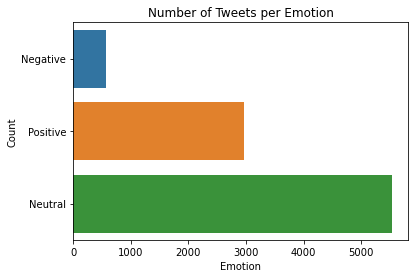

In [3]:
p = sns.countplot(data = df, y = 'Emotion') #Setting p to plot of Emotion
p.set(xlabel = 'Emotion') #Setting x label
p.set(ylabel = 'Count') #Setting y label
p.set(title = 'Number of Tweets per Emotion'); #Setting title of plot

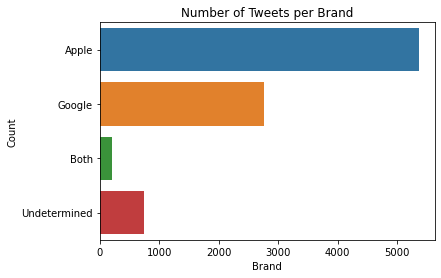

In [4]:
p = sns.countplot(data = df, y = 'Brand') #Setting p to plot of Brand
p.set(xlabel = 'Brand') #Setting x label
p.set(ylabel = 'Count') #Setting y label
p.set(title = 'Number of Tweets per Brand'); #Setting title of plot

## Spread of Emotions

I want to take a quick look at how the rated tweets are spread amongst the brands. This will help identify if any brands have more negative or positive tweets over another.

In [5]:
display(df.groupby(['Emotion'])['Brand'].value_counts()) #Checking tweets rated by brand

display(df.groupby(['Brand'])['Emotion'].value_counts()) #Checking tweets rated by brand

Emotion   Brand       
Negative  Apple            415
          Google           150
          Both               3
          Undetermined       1
Neutral   Apple           2823
          Google          1784
          Undetermined     725
          Both             199
Positive  Apple           2123
          Google           823
          Undetermined      13
          Both              11
Name: Brand, dtype: int64

Brand         Emotion 
Apple         Neutral     2823
              Positive    2123
              Negative     415
Both          Neutral      199
              Positive      11
              Negative       3
Google        Neutral     1784
              Positive     823
              Negative     150
Undetermined  Neutral      725
              Positive      13
              Negative       1
Name: Emotion, dtype: int64

Let's create a visualization to look at the spread of rated tweets for each brand.

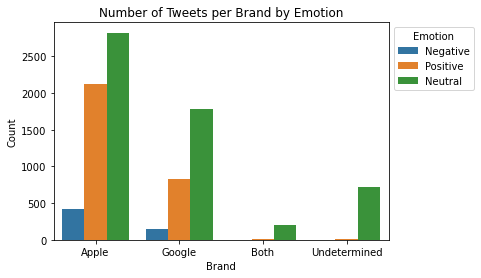

In [6]:
p = sns.countplot(data = df, x = 'Brand', hue = 'Emotion') #Setting p to plot of Brand and Emotion
p.legend(title = 'Emotion', bbox_to_anchor = (1, 1), loc = 'upper left') #Creating legend for plot
p.set(xlabel = 'Brand') #Setting x label
p.set(ylabel = 'Count') #Setting y label
p.set(title = 'Number of Tweets per Brand by Emotion'); #Setting title of plot

This visualization is extremely helpful in understanding how our tweets are spread out amongst the brands. Let's make a visualization of the spread of tweets per brand by emotion now. Then after we're going to look at the normalized value counts of those two groups to see what percent of tweets are within each.

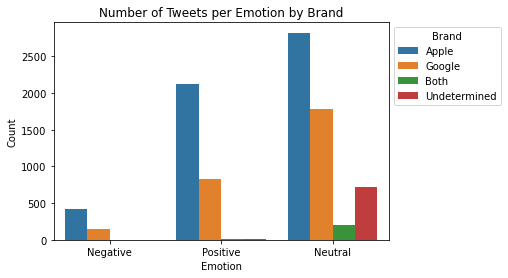

In [7]:
p = sns.countplot(data = df, x = 'Emotion', hue = 'Brand') #Setting p to plot of Emotion and Brand
p.legend(title = 'Brand', bbox_to_anchor = (1, 1), loc = 'upper left') #Creating legend for plot
p.set(xlabel = 'Emotion') #Setting x label
p.set(ylabel = 'Count') #Setting y label
p.set(title = 'Number of Tweets per Emotion by Brand'); #Setting title of plot

In [8]:
display(df.groupby(['Emotion'])['Brand'].value_counts(normalize = True)) #Checking normalized tweets rated by brand

display(df.groupby(['Brand'])['Emotion'].value_counts(normalize = True)) #Checking normalized tweets rated by brand

Emotion   Brand       
Negative  Apple           0.729350
          Google          0.263620
          Both            0.005272
          Undetermined    0.001757
Neutral   Apple           0.510396
          Google          0.322546
          Undetermined    0.131079
          Both            0.035979
Positive  Apple           0.714815
          Google          0.277104
          Undetermined    0.004377
          Both            0.003704
Name: Brand, dtype: float64

Brand         Emotion 
Apple         Neutral     0.526581
              Positive    0.396008
              Negative    0.077411
Both          Neutral     0.934272
              Positive    0.051643
              Negative    0.014085
Google        Neutral     0.647080
              Positive    0.298513
              Negative    0.054407
Undetermined  Neutral     0.981055
              Positive    0.017591
              Negative    0.001353
Name: Emotion, dtype: float64

I wanted to check out the normalized value counts to get an idea of the percentage of spreads.

Among emotion: 73% of negative tweets were about the brand apple, 26% were about google, .5% were about both and approximately .2% were undetermined. 51% of neutral tweets were about apple, 32% were about google, 13% were undetermined, and approximately 3.6% were about both. 71% of positive tweets were about apple, 28% were about google, .4% were undetermined, and .3% were about both.

Among brand: 53% of tweets about the brand apple were neutral, 40% were positive, and 7% were negative. 93% of tweets about both brands were neutral, 5% were positive, and 1% were negative. 65% of tweets about the brand google were neutral, 30% were positive, and 5% were negative. 98% of tweets about undetermined brands were neutral, 1.8% were positive, and .1% were negative.


## Tweet Length

I made sure to include columns in the dataframe that were counts of the number of characters in a tweet, as well as columns that counted the number of tokens. There are corresponding columns for both the untouched and cleaned tweets. I want to start by looking at how the cleaning process changed the shape of our data.

### Comparing Character Count Before and After Cleaning

       Tweet Character Count  Clean Character Count
count            9070.000000            9070.000000
mean              104.959647              86.075854
std                27.202956              25.377363
min                11.000000               2.000000
25%                86.000000              68.000000
50%               109.000000              87.000000
75%               126.000000             105.000000
max               178.000000             142.000000


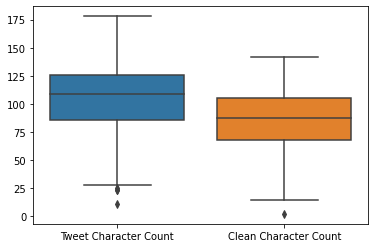

In [9]:
charactercountdf = df[['Tweet Character Count', 'Clean Character Count']].copy() #Making dataframe for boxplot
sns.boxplot(data = charactercountdf); #Creating boxplot to compare character counts
print(charactercountdf.describe()) #Looking at descriptive statistics

Looking at just the character counts, we're seeing that the average number of characters prior to cleaning was around 105, and after cleaning the average number of characters was 86. Let's take a look at the token counts now.

### Comparing Token Count Before and After Cleaning

       Tweet Token Count  Clean Token Count
count        9070.000000        9070.000000
mean           21.369901          12.446968
std             5.852884           3.764603
min             2.000000           0.000000
25%            17.000000          10.000000
50%            22.000000          12.000000
75%            26.000000          15.000000
max            95.000000          25.000000


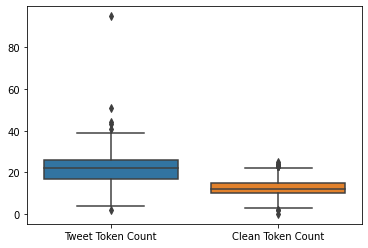

In [10]:
tokencountdf = df[['Tweet Token Count', 'Clean Token Count']].copy() #Making dataframe for boxplot
sns.boxplot(data = tokencountdf); #Creating boxplot to compare token counts
print(tokencountdf.describe()) #Looking at descriptive statistics

Now looking at the token counts, we're seeing the average number of tokens prior to cleaning was around 21, and after cleaning the average number of tokens was 12. While this is visually helpful, conceptually I'd like to add a column to calculate the percent change for both of these, as well as a column that holds the difference between the counts.

In [11]:
charactercountdf['Difference'] = abs((charactercountdf['Tweet Character Count']) - 
                                    (charactercountdf['Clean Character Count'])) #Calculating difference
charactercountdf['Percent Change'] = abs((((charactercountdf['Clean Character Count']) - 
                                     (charactercountdf['Tweet Character Count'])) / 
                                      (charactercountdf['Tweet Character Count'])) * 100) #Calculating percent change

tokencountdf['Difference'] = abs((tokencountdf['Tweet Token Count']) - 
                                    (tokencountdf['Clean Token Count'])) #Calculating difference
tokencountdf['Percent Change'] = abs((((tokencountdf['Clean Token Count']) - 
                                     (tokencountdf['Tweet Token Count'])) / 
                                      (tokencountdf['Tweet Token Count'])) * 100) #Calculating percent change

print(charactercountdf.describe()) #Printing descriptive statistics to compare
print(tokencountdf.describe()) #Printing descriptive statistics to compare

       Tweet Character Count  Clean Character Count   Difference  \
count            9070.000000            9070.000000  9070.000000   
mean              104.959647              86.075854    18.883793   
std                27.202956              25.377363    11.571490   
min                11.000000               2.000000     1.000000   
25%                86.000000              68.000000    10.000000   
50%               109.000000              87.000000    17.000000   
75%               126.000000             105.000000    26.000000   
max               178.000000             142.000000   120.000000   

       Percent Change  
count     9070.000000  
mean        18.209767  
std         10.402382  
min          0.714286  
25%         10.606061  
50%         17.171717  
75%         24.416316  
max         81.818182  
       Tweet Token Count  Clean Token Count   Difference  Percent Change
count        9070.000000        9070.000000  9070.000000     9070.000000
mean           21.369901 

Again, I wanted to calculate the percent change because the visualizations weren't totally clear. I wanted a better conceptual understanding of how cleaning the tweets changed the size of them in number of characters and in number of tokens. Looking at the number of characters in a tweet, the average percent change after cleaning was about 18%, meaning that cleaning a tweet removed approximately 18% of the characters. The biggest percent change between characters was around 82%, and the smallest was just below 1%. On average, cleaning removed about 19 characters per tweet, with a maximum of 120 characters removed and a minimum of 1 character removed. Looking at the number of tokens in a tweet, the average percent change after cleaning was about 36%, meaning that cleaning a tweet removed approximately 36% of the tokens. The biggest percent change between tokens was around 91%, and the smallest was 0. On average, cleaning removed about 8 tokens per tweet, with a maximum of 86 tokens removed and a minimum of 0 tokens removed.

### Character and Token Counts

Next I want to take a deeper dive into the cleaned character counts and token counts and how they differ between prodcuts, brands, and emotions.

#### Character Counts by Emotion

In [12]:
df.groupby(['Emotion'])['Clean Character Count'].mean() #Checking average character count per emotion

Emotion
Negative    94.896309
Neutral     84.241186
Positive    87.802694
Name: Clean Character Count, dtype: float64

Negative tweets have the most characters, rounding it to an average of 95 characters per tweet, followed by positive tweets that have an average of 88 characters, and finally neutral tweets have an average of 84 characters per tweet.

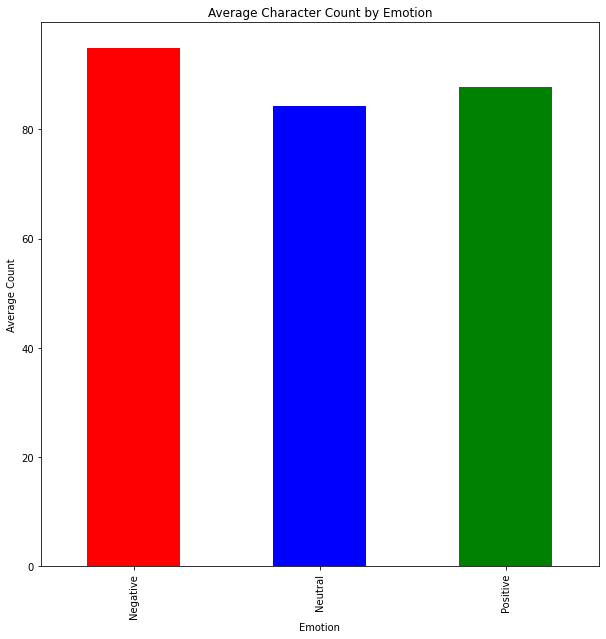

In [13]:
plt.figure(figsize = (10, 10)) #Setting size of figure
df.groupby(['Emotion'])['Clean Character Count'].mean().plot.bar(color = ['red', 
                                                                         'blue', 
                                                                        'green']); #Plotting average count by emotion
plt.ylabel('Average Count') #Naming y-axis
plt.title('Average Character Count by Emotion') #Plot title
plt.show() #Shows plot

#### Token Counts by Emotion

In [14]:
df.groupby(['Emotion'])['Clean Token Count'].mean() #Checking average token count per emotion

Emotion
Negative    13.871705
Neutral     12.106852
Positive    12.807407
Name: Clean Token Count, dtype: float64

Following suit, it makes sense that negative tweets on average have the most tokens since they also have the most characters. Negative tweets have an average of 14 tokens, followed by 12.8 in positive tweets and 12.1 in neutral. I've been rounding these numbers but I'm distinguishing here because they are so close.

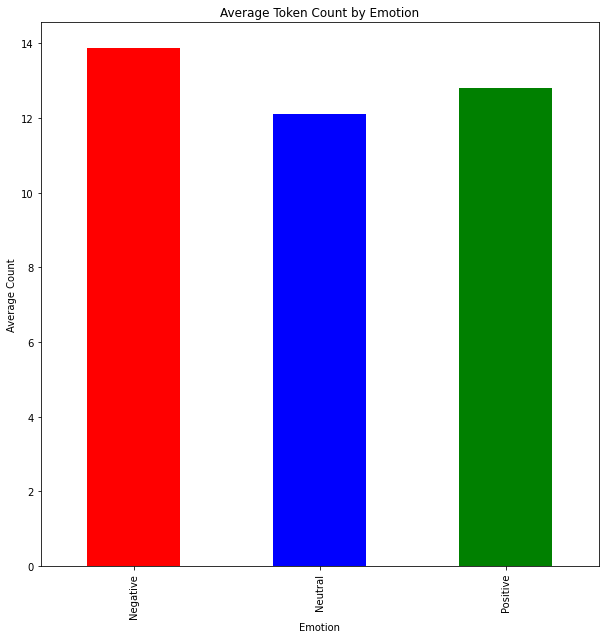

In [15]:
plt.figure(figsize = (10, 10)) #Setting size of figure
df.groupby(['Emotion'])['Clean Token Count'].mean().plot.bar(color = ['red', 
                                                                         'blue', 
                                                                        'green']); #Plotting average count by emotion
plt.ylabel('Average Count') #Naming y-axis
plt.title('Average Token Count by Emotion') #Plot title
plt.show() #Shows plot

#### Character Counts by Product

In [16]:
df.groupby(['Product'])['Clean Character Count'].mean() #Checking average character count per product

Product
Android                            88.285714
Android App                        85.812500
Apple                              88.033384
Google                             92.696262
Other Apple product or service     84.771429
Other Google product or service    91.795222
Undetermined                       84.408258
iPad                               85.979894
iPad or iPhone App                 89.872068
iPhone                             93.033784
Name: Clean Character Count, dtype: float64

Tweets about iPhone and Google had an average of 93 and 92 characters, respectively, followed by other Google products or services with 91 characters and iPad or iPhone Apps at 89. Then tweets about Android or Apple had an average of 88 characters, followed by tweets about Android apps or iPad with an average of 85 characters. Other Apple products or services and Undetermined products both had an average of 84 characters per tweet.

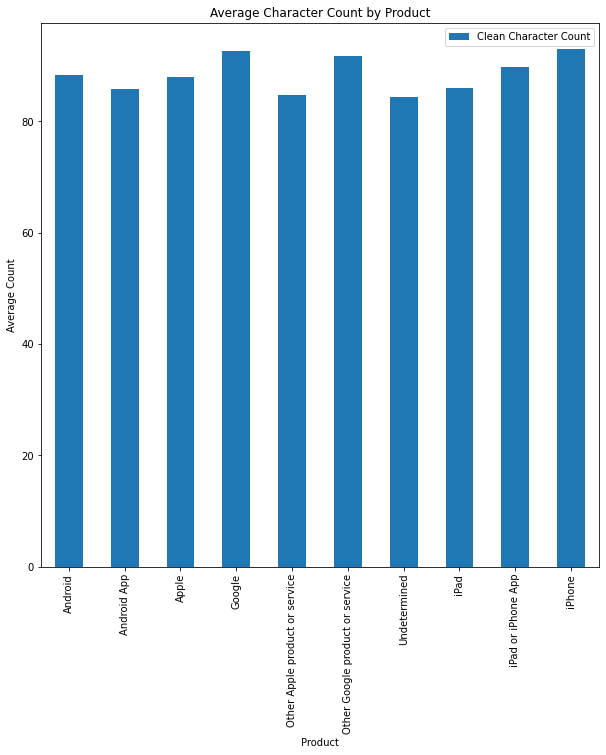

In [17]:
plt.figure(figsize = (10, 10)) #Setting size of figure
df.groupby(['Product'])['Clean Character Count'].mean().plot.bar(legend = True); #Plotting average count by product
plt.ylabel('Average Count') #Naming y-axis
plt.title('Average Character Count by Product') #Plot title
plt.xticks(rotation = 90) #Rotating labels
plt.show() #Shows plot

#### Token Counts by Product

In [18]:
df.groupby(['Product'])['Clean Token Count'].mean() #Checking average token count per product

Product
Android                            12.857143
Android App                        12.637500
Apple                              12.772382
Google                             13.242991
Other Apple product or service     12.342857
Other Google product or service    13.126280
Undetermined                       12.143746
iPad                               12.813757
iPad or iPhone App                 13.049041
iPhone                             13.557432
Name: Clean Token Count, dtype: float64

Alright so these are much more similar than the character counts were. We're seeing about half of the products with an average of 13 tokens and the other half with an average of 12 tokens. Specifically, tweets about iPhone, iPad or iPhone App, Google, and iPad (in that order) have a descending average between 13.6 and 13.04 tokens per tweet.

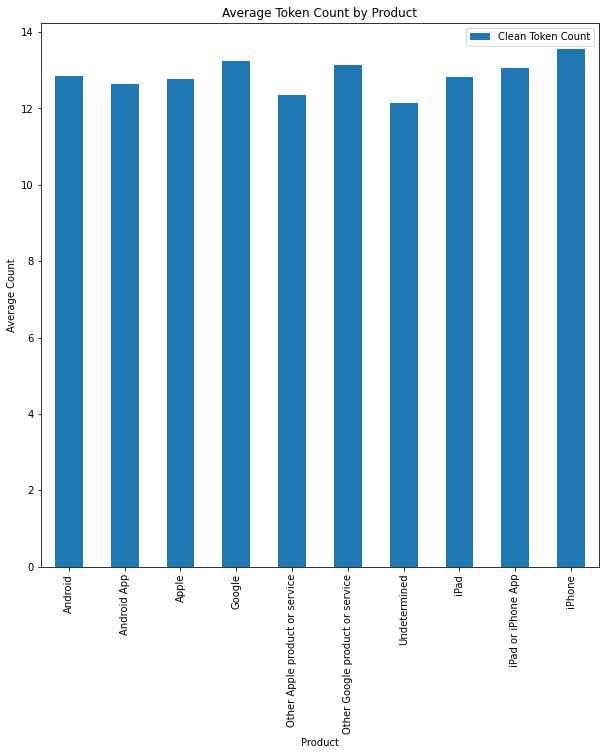

In [19]:
plt.figure(figsize = (10, 10)) #Setting size of figure
df.groupby(['Product'])['Clean Token Count'].mean().plot.bar(legend = True); #Plotting average count by product
plt.ylabel('Average Count') #Naming y-axis
plt.title('Average Token Count by Product') #Plot title
plt.xticks(rotation = 90) #Rotating labels
plt.show() #Shows plot

#### Character Counts by Brand

In [20]:
df.groupby(['Brand'])['Clean Character Count'].mean() #Checking average character count per brand

Brand
Apple           86.580675
Both            94.281690
Google          87.556039
Undetermined    74.526387
Name: Clean Character Count, dtype: float64

Tweets with both products had an average of 94 characters, followed by tweets about Google with 88 characters, then tweets about Apple with 87 characters, and finally tweets with an undetermined brand had an average of 75 characters.

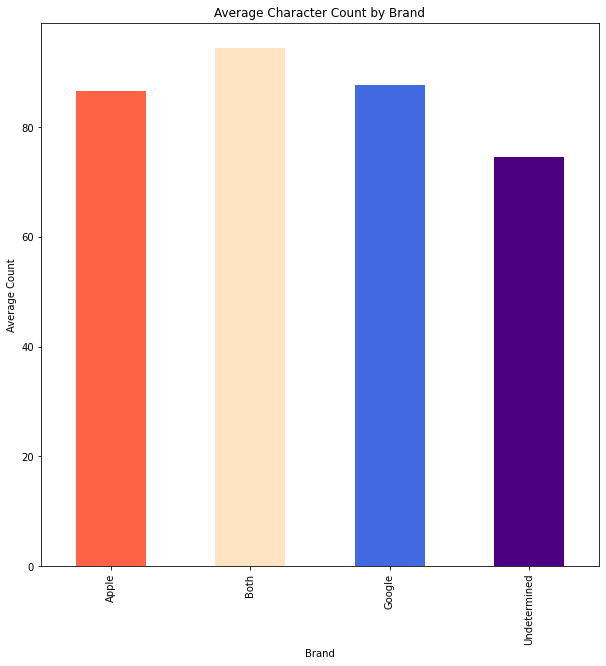

In [21]:
plt.figure(figsize = (10, 10)) #Setting size of figure
df.groupby(['Brand'])['Clean Character Count'].mean().plot.bar(color = ['tomato', 
                                                                       'bisque', 
                                                                       'royalblue', 
                                                                       'indigo']); #Plotting average count by brand
plt.ylabel('Average Count') #Naming y-axis
plt.title('Average Character Count by Brand') #Plot title
plt.show() #Shows plot

#### Token Counts by Brand

In [22]:
df.groupby(['Brand'])['Clean Token Count'].mean() #Checking average token count per brand

Brand
Apple           12.635889
Both            13.178404
Google          12.504897
Undetermined    10.649526
Name: Clean Token Count, dtype: float64

Again, following suit from character counts, tweets about both products have the most average tokens at 13 per tweet, followed by tweets about Apple, with an average of 12.6, and tweets about Google, with an average of 12.5. Tweets about an undetermined brand have an average of 10.6 tokens.

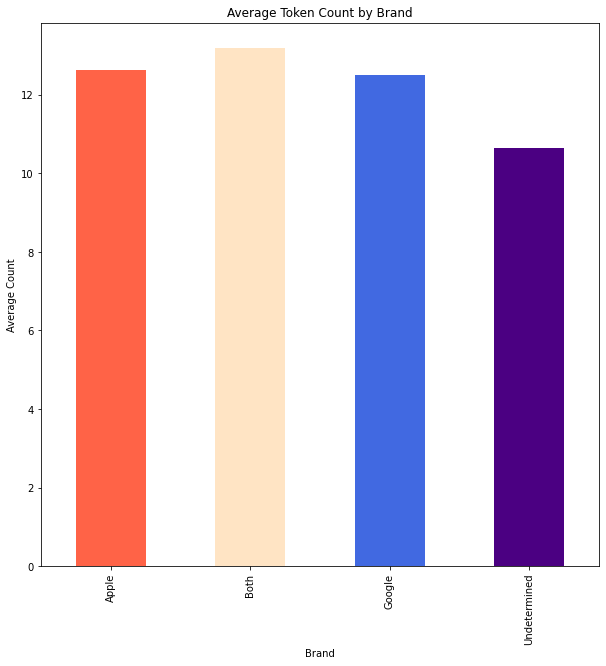

In [23]:
plt.figure(figsize = (10, 10)) #Setting size of figure
df.groupby(['Brand'])['Clean Token Count'].mean().plot.bar(color = ['tomato', 
                                                                       'bisque', 
                                                                       'royalblue', 
                                                                       'indigo']); #Plotting average count by brand
plt.ylabel('Average Count') #Naming y-axis
plt.title('Average Token Count by Brand') #Plot title
plt.show() #Shows plot

## Hashtags

I want to take a look at the use of hashtags and how they're used within the tweets in this dataset. I'm going to use my hashtag column to make a tokenized list of hashtags. I'll need to clean it up a bit and remove the extra punctuation (brackets, commas, and hashtags) but I won't be removing any stopwords as hashtags are unique identifiers for a tweet.

In [24]:
ListOfHashtags = df['Hashtag'].to_list() #Converting hashtags to list
RawHashBag = ','.join(map(str, ListOfHashtags)) #Converting list to bag of words
RawHashTokens = word_tokenize(RawHashBag) #Tokenize bag of words

hashstops = (list(string.punctuation) + ['“','”','...',"''",'’','``',"'",',','#','[',']']) #New hashstops

def remove_hashstops(bag, stopwords = hashstops): #Defining new stopword removal function
    stops_removed = [word.lower() for word in bag if word.lower() not in stopwords] #Remove if in list
    return stops_removed #Return lowercase word if not in list

CleanHashTokens = remove_hashstops(RawHashTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(CleanHashTokens) #Setting frequency to CleanHashTokens
frequency.most_common(25) #Looking at 25 most common tokens

[('sxsw', 9092),
 ('apple', 416),
 ('google', 321),
 ('sxswi', 316),
 ('ipad2', 296),
 ('iphone', 265),
 ('ipad', 264),
 ('android', 131),
 ('austin', 112),
 ('circles', 98),
 ('tech', 87),
 ('ubersocial', 68),
 ('gsdm', 64),
 ('japan', 58),
 ('tapworthy', 54),
 ('fb', 52),
 ('qagb', 50),
 ('infektd', 48),
 ('winning', 44),
 ('uxdes', 40),
 ('edchat', 37),
 ('itunes', 37),
 ('musedchat', 34),
 ('newtwitter', 33),
 ('mashable', 33)]

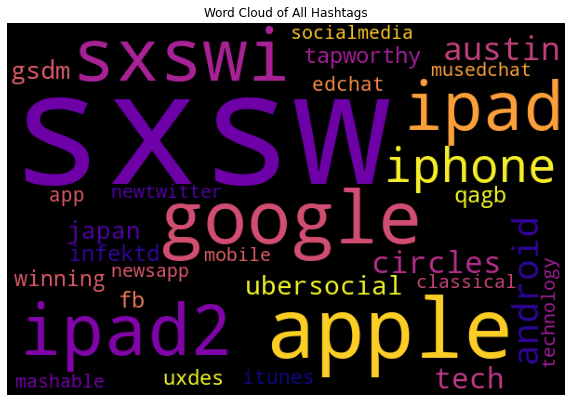

In [25]:
wordcloud = WordCloud(stopwords = None, collocations = False, width = 600, height = 400, 
                      min_font_size = 16, background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((CleanHashTokens))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of All Hashtags'); #Set title of plot

### Hashtags and Emotions

In [26]:
print(df.groupby(['Emotion'])['Hashtag Count'].count()) #Grabbing total number of hashtags per emotion

print(df.groupby(['Emotion'])['Hashtag Count'].mean()) #Grabbing average number of hashtags per emotion tweet

Emotion
Negative     569
Neutral     5531
Positive    2970
Name: Hashtag Count, dtype: int64
Emotion
Negative    1.594025
Neutral     1.787380
Positive    1.680471
Name: Hashtag Count, dtype: float64


Here we see that neutral tweets used the most amount of hashtags with 5531, followed by positive tweets with 2970, and finally negative tweets with 569. This is definitely something to keep in mind - that negative tweets don't use as many hashtags. I was expecting there to be more positive tweets with hashtags overall but it is actually neutral tweets that has the most.

When looking at the average number of hashtags per tweet, it does make sense that they're in the same descending order: neutral, positve, and negative. However, while more neutral and positive tweets use hashtags, all three emotions have similar averages of hashtags per tweet. Let's continue to break this down further and look at which hashtags were used most within each emotion.

#### Negative Hashtags

In [27]:
NegativeDF = df[df['Emotion'] == 'Negative'] #New dataframe of just negative tweets

NegativeHash = NegativeDF['Hashtag'].to_list() #Converting hashtags to list
NegHashRawBag = ','.join(map(str, NegativeHash)) #Converting list to bag of words
NegHashRawTokens = word_tokenize(NegHashRawBag) #Tokenize bag of words

NegHashCleanTok = remove_hashstops(NegHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(NegHashCleanTok) #Setting frequency to NegHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for negative tweets

[('sxsw', 569),
 ('ipad', 19),
 ('apple', 15),
 ('google', 13),
 ('iphone', 12),
 ('tapworthy', 12),
 ('sxswi', 11),
 ('fail', 11),
 ('japan', 9),
 ('circles', 8),
 ('ipad2', 8),
 ('enchantment', 5),
 ('flipboard', 5),
 ('qagb', 4),
 ('newsapps', 4),
 ('android', 4),
 ('apps', 4),
 ('pnid', 4),
 ('socialviewing', 4),
 ('social', 3),
 ('batterykiller', 3),
 ('rji', 3),
 ('psych', 3),
 ('ubersocial', 3),
 ('media', 3)]

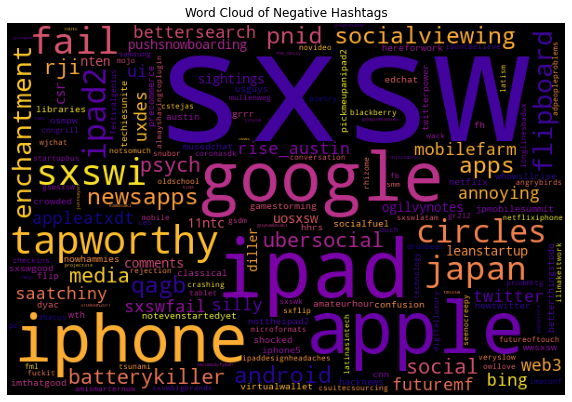

In [28]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((NegHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Negative Hashtags'); #Set title of plot

Sxsw is the most used hashtag for negative tweets, followed mainly by product/brand identifying hashtags. One hashtag that stands out to me is the word "fail" which is the 8th most common hashtag for negative tweets; this is all relative though because 8th most common means it only occurs 11 times. Another hashtag that stands out to me is "batterkiller". Let's take a look at neutral tweets next.

#### Neutral Hashtags

In [29]:
NeutralDF = df[df['Emotion'] == 'Neutral'] #New dataframe of just neutral tweets

NeutralHash = NeutralDF['Hashtag'].to_list() #Converting hashtags to list
NeuHashRawBag = ','.join(map(str, NeutralHash)) #Converting list to bag of words
NeuHashRawTokens = word_tokenize(NeuHashRawBag) #Tokenize bag of words

NeuHashCleanTok = remove_hashstops(NeuHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(NeuHashCleanTok) #Setting frequency to NeuHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for neutral tweets

[('sxsw', 5539),
 ('google', 239),
 ('apple', 224),
 ('sxswi', 209),
 ('iphone', 171),
 ('ipad2', 158),
 ('ipad', 152),
 ('android', 85),
 ('circles', 73),
 ('austin', 71),
 ('tech', 59),
 ('gsdm', 47),
 ('infektd', 46),
 ('ubersocial', 44),
 ('japan', 44),
 ('fb', 38),
 ('qagb', 37),
 ('edchat', 36),
 ('musedchat', 33),
 ('newtwitter', 32),
 ('uxdes', 32),
 ('classical', 30),
 ('socialmedia', 28),
 ('itunes', 27),
 ('touchingstories', 26)]

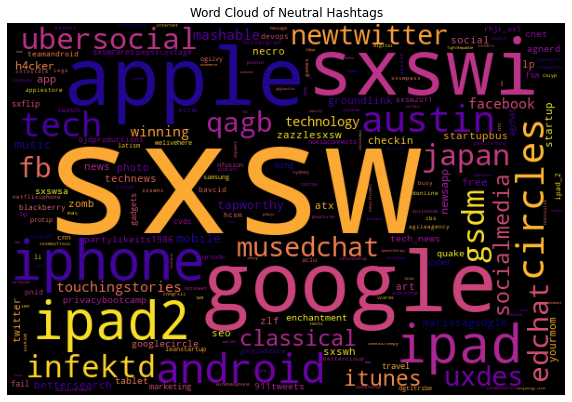

In [30]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((NeuHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Neutral Hashtags'); #Set title of plot

Again, sxsw is the most used hashtag, followed by product/brand hashtags. I would categorize these hashtags to be more neutral as well, compared to the hashtags in the negative tweets. There are more nouns here and more adjectives in the negative tweets. Now let's take a look at the distribution of hashtags used in positive tweets.

#### Positive Hashtags

In [31]:
PositiveDF = df[df['Emotion'] == 'Positive'] #New dataframe of just positive tweets

PositiveHash = PositiveDF['Hashtag'].to_list() #Converting hashtags to list
PosHashRawBag = ','.join(map(str, PositiveHash)) #Converting list to bag of words
PosHashRawTokens = word_tokenize(PosHashRawBag) #Tokenize bag of words

PosHashCleanTok = remove_hashstops(PosHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(PosHashCleanTok) #Setting frequency to PosHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for positive tweets

[('sxsw', 2984),
 ('apple', 177),
 ('ipad2', 130),
 ('sxswi', 96),
 ('ipad', 93),
 ('iphone', 82),
 ('google', 69),
 ('android', 42),
 ('austin', 40),
 ('tech', 28),
 ('hollergram', 23),
 ('ubersocial', 21),
 ('tapworthy', 21),
 ('winning', 19),
 ('circles', 17),
 ('gsdm', 16),
 ('fb', 13),
 ('marissagoogle', 13),
 ('911tweets', 12),
 ('newsapps', 12),
 ('app', 11),
 ('mobile', 10),
 ('lp', 10),
 ('itunes', 10),
 ('zazzlesxsw', 10)]

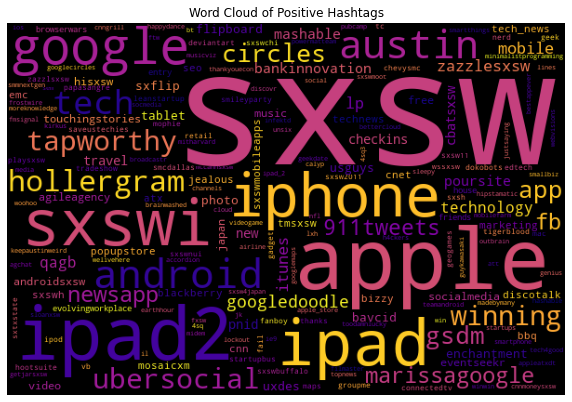

In [32]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((PosHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Positive Hashtags'); #Set title of plot

Again we're seeing sxsw as the most used hashtag, followed by product/brand hashtags. I would classify these hashtags as more positive, with words such as "winning" and "free," as well as "new". We can definitely see how the spread of hashtags changed as the sentiment of the tweet changed.

Let's take a look at hashtags and brands and see how they differ.

### Hashtags and Brands

In [33]:
print(df.groupby(['Brand'])['Hashtag Count'].count()) #Grabbing total number of hashtags per brand

print(df.groupby(['Brand'])['Hashtag Count'].mean()) #Grabbing average number of hashtags per brand tweet

Brand
Apple           5361
Both             213
Google          2757
Undetermined     739
Name: Hashtag Count, dtype: int64
Brand
Apple           1.737922
Both            2.061033
Google          1.670657
Undetermined    1.924222
Name: Hashtag Count, dtype: float64


Tweets about Apple have the most hashtags, followed by tweets about Google. Tweets where the brand is undetermined and tweets about both brands follow next but both pale in comparison to the first two.

This is interesting, tweets about both brands have an average of 2 tweets while tweets about individual brands have an average of 1 tweet. I wonder what hashtags are most used within each brand, we'll be using the following cells to determine this and to create some word clouds to accompany this as well.

#### Apple Hashtags

In [34]:
AppleBDF = df[df['Brand'] == 'Apple'] #New dataframe of just apple brand tweets

AppleHash = AppleBDF['Hashtag'].to_list() #Converting hashtags to list
AppleHashRawBag = ','.join(map(str, AppleHash)) #Converting list to bag of words
AppleHashRawTokens = word_tokenize(AppleHashRawBag) #Tokenize bag of words

AppleHashCleanTok = remove_hashstops(AppleHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(AppleHashCleanTok) #Setting frequency to AppleHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for apple brand tweets

[('sxsw', 5374),
 ('apple', 413),
 ('ipad2', 294),
 ('ipad', 259),
 ('iphone', 234),
 ('sxswi', 162),
 ('austin', 78),
 ('ubersocial', 68),
 ('tech', 66),
 ('tapworthy', 54),
 ('japan', 43),
 ('uxdes', 40),
 ('winning', 39),
 ('fb', 34),
 ('mashable', 32),
 ('newsapps', 30),
 ('hollergram', 25),
 ('zazzlesxsw', 25),
 ('technology', 24),
 ('lp', 20),
 ('enchantment', 18),
 ('gsdm', 17),
 ('atx', 16),
 ('news', 16),
 ('touchingstories', 16)]

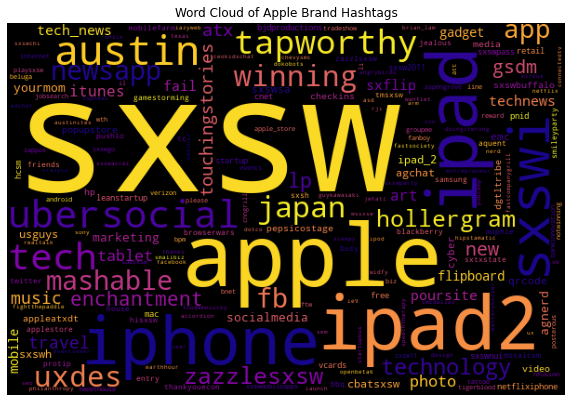

In [35]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((AppleHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Apple Brand Hashtags'); #Set title of plot

We're seeing a lot of hashtags with apple buzzwords in them, like "apple", "ipad", and "iphone", as well as positive hashtags like "winning". One hashtag that stands out to me here, used 16 times, is "touchingstories". Let's move on to Google.

#### Google Hashtags

In [36]:
GoogleBDF = df[df['Brand'] == 'Google'] #New dataframe of just google brand tweets

GoogleHash = GoogleBDF['Hashtag'].to_list() #Converting hashtags to list
GoogleHashRawBag = ','.join(map(str, GoogleHash)) #Converting list to bag of words
GoogleHashRawTokens = word_tokenize(GoogleHashRawBag) #Tokenize bag of words

GoogleHashCleanTok = remove_hashstops(GoogleHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(GoogleHashCleanTok) #Setting frequency to GoogleHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for google brand tweets

[('sxsw', 2766),
 ('google', 315),
 ('circles', 96),
 ('android', 94),
 ('sxswi', 92),
 ('qagb', 50),
 ('gsdm', 37),
 ('marissagoogle', 27),
 ('911tweets', 22),
 ('austin', 20),
 ('mobile', 20),
 ('socialmedia', 20),
 ('facebook', 20),
 ('tech', 17),
 ('seo', 14),
 ('social', 13),
 ('bettersearch', 13),
 ('bavcid', 13),
 ('pnid', 12),
 ('googledoodle', 11),
 ('googlecircles', 11),
 ('fail', 10),
 ('fb', 10),
 ('agileagency', 10),
 ('checkins', 10)]

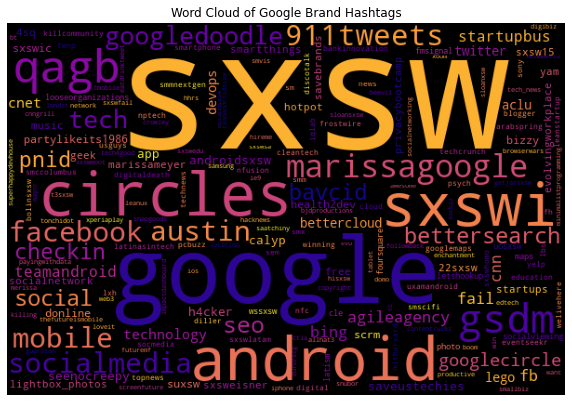

In [37]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((GoogleHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Google Brand Hashtags'); #Set title of plot

Here we're seeing a lot of hashtags regarding google brand products. This makes sense the same way the hashtags for tweets about apple brands made sense. Let's look at hashtags for tweets about both brands.

#### Both Brand Hashtags

In [38]:
BothDF = df[df['Brand'] == 'Both'] #New dataframe of just both brand tweets

BBHash = BothDF['Hashtag'].to_list() #Converting hashtags to list
BBHashRawBag = ','.join(map(str, BBHash)) #Converting list to bag of words
BBHashRawTokens = word_tokenize(BBHashRawBag) #Tokenize bag of words

BBHashCleanTok = remove_hashstops(BBHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(BBHashCleanTok) #Setting frequency to BBHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for positive tweets

[('sxsw', 213),
 ('android', 33),
 ('iphone', 29),
 ('sxswi', 7),
 ('blackberry', 6),
 ('ipad', 5),
 ('hootsuite', 4),
 ('google', 4),
 ('sxflip', 3),
 ('gsdm', 3),
 ('platform', 3),
 ('apple', 3),
 ('dickbar', 3),
 ('lolshow', 3),
 ('futuremf', 2),
 ('hashable', 2),
 ('windowsphone', 2),
 ('windowsmobile', 2),
 ('developers', 2),
 ('tech', 2),
 ('social', 2),
 ('rhjr_ux5', 2),
 ('connectedtv', 2),
 ('sms', 2),
 ('sxswaccel', 2)]

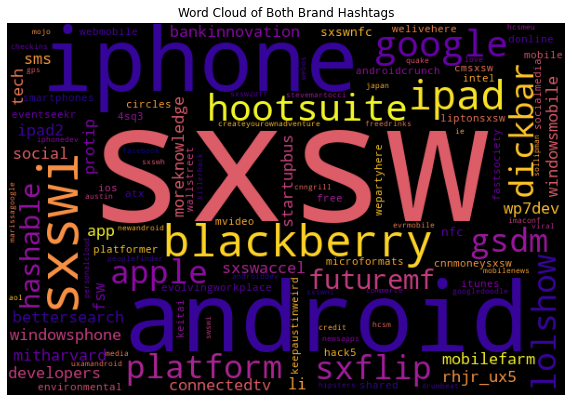

In [39]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((BBHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Both Brand Hashtags'); #Set title of plot

Here we're seeing more hashtags that weren't previously prevalent, such as "blackberry", "lolshow", and oddly enough, "dickbar". Let's take a look at our final group of hashtags, those tweeted about an undetermined brand.

#### Undetermined Brand Hashtags

In [40]:
UndeterminedBDF = df[df['Brand'] == 'Undetermined'] #New dataframe of just undetermined brand tweets

UnHash = UndeterminedBDF['Hashtag'].to_list() #Converting hashtags to list
UnHashRawBag = ','.join(map(str, UnHash)) #Converting list to bag of words
UnHashRawTokens = word_tokenize(UnHashRawBag) #Tokenize bag of words

UnHashCleanTok = remove_hashstops(UnHashRawTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(UnHashCleanTok) #Setting frequency to UnHashCleanTok
frequency.most_common(25) #Looking at 25 most common hashtag tokens for positive tweets

[('sxsw', 739),
 ('sxswi', 55),
 ('infektd', 46),
 ('edchat', 33),
 ('musedchat', 33),
 ('newtwitter', 32),
 ('classical', 30),
 ('itunes', 23),
 ('groundlink', 16),
 ('touchingstories', 15),
 ('zlf', 15),
 ('h4ckers', 14),
 ('japan', 13),
 ('austin', 13),
 ('necro', 13),
 ('zomb', 11),
 ('fb', 8),
 ('sxswcares', 8),
 ('quake', 8),
 ('free', 8),
 ('sxswh', 7),
 ('music', 7),
 ('gsdm', 7),
 ('cvdc', 7),
 ('fsw', 6)]

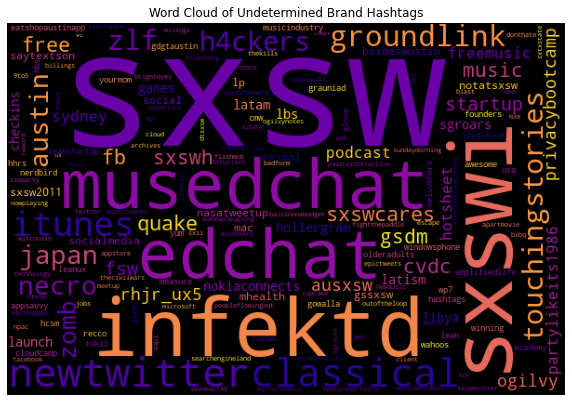

In [41]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join((UnHashCleanTok))) #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #Set figure size
plt.imshow(wordcloud) #Shows wordcloud
plt.axis('off') #Sets axis
plt.title('Word Cloud of Undetermined Brand Hashtags'); #Set title of plot

Again, here I'm seeing a lot of hashtags that weren't prevalent on previous wordclouds. I'm not going to explore the spread of hashtag frequencies within products as I feel that will be diving too deep into non-important specifics, and we were able to get a good idea of how the hashtags differed between brands (which is a larger grouping of the products).


## Splitting Tweets

Next we're going to split our tweets by feature by creating new dataframes for each class within emotion and brand. This will be helfpul in specific explorations as you'll see. Because I saved the dataframe to csv from the previous notebook, the cleaned tokens column needs to be parsed through again so the brackets, apostrophes, and other added non-essential marks can be removed. Again, these marks were added during the dataframe saving process and need to be removed so we can accurately look at our tokens. I've added "sxsw" to the stopwords list here because from what we've seen this word is going to be prevalent among every single class regardless of what it means, and I think I'll be able to get a better idea of things if it's removed.

In [42]:
new_stopwords = ['a', 'am', 'an', 'and', 'at', 'be', 'for', 'from', 'if', 
                 'in', 'it', "it's", 'its', 'itself', 'my', 'of', 'on', 'or', 'rt', 'sxsw', 
                 'that', 'the', 'their', 'theirs', 'these', 'this', 'those', 'to'] #New list

new_stopwords.extend(hashstops) #Add list of hashstops to stopwords

def remove_stopwords(text): #Function to remove stopwords
    return [word for word in word_tokenize(text) if not word in new_stopwords] #Returns tweet without stopwords

df['Cleaned Tokens'] = df.Clean.apply(lambda x: remove_stopwords(x)) #Applying function to build new column
df.head() #Checking for column

Tweet             Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

    Emotion   Brand  Tweet Character Count                    Hashtag  \
0  Negative   Apple                    127  ['#RISE_Austin', '#SXSW']   
1  Positive   Apple                    139                  ['#SXSW']   
2  Positive   Apple                     79         ['#iPad', '#SXSW']   
3  Negative   Apple                     82                  ['#sxsw']   
4  Positive  Google                    131                  ['#SXSW']   

   Hashtag Count                                              Clean  \
0              2   i have a g iphone after hrs tweeting at risea...   
1              1   know about awesome ipadiphone app that youll ...   
2              2   can not wait for ipad also they should sale t...   
3              1   i hope this years festival isnt as crashy as ...   
4              1   great stuff on fri sxsw marissa mayer google ...   

   Clean Character Count                                       Clean Tokens  \
0                    104  ['i', 'have', 'g', 'iphone', 'after', 'hrs', '...   
1                    112  ['know', 'about', 'awesome', 'ipadiphone', 'ap...   
2                     61  ['can', 'not', 'wait', 'ipad', 'also', 'they',...   
3                     71  ['i', 'hope', 'years', 'festival', 'isnt', 'as...   
4                    103  ['great', 'stuff', 'fri', 'sxsw', 'marissa', '...   

   Clean Token Count                                       Tweet Tokens  \
0                 16  ['.', '@wesley83', 'I', 'have', 'a', '3G', 'iP...   
1                 15  ['@jessedee', 'Know', 'about', '@fludapp', '?'...   
2                 11  ['@swonderlin', 'Can', 'not', 'wait', 'for', '...   
3                 12  ['@sxsw', 'I', 'hope', 'this', "year's", 'fest...   
4                 14  ['@sxtxstate', 'great', 'stuff', 'on', 'Fri', ...   

   Tweet Token Count                                     Cleaned Tokens  
0                 29  [i, have, g, iphone, after, hrs, tweeting, ris...  
1                 26  [know, about, awesome, ipadiphone, app, youll,...  
2                 17  [can, not, wait, ipad, also, they, should, sal...  
3                 16  [i, hope, years, festival, isnt, as, crashy, a...  
4                 27  [great, stuff, fri, marissa, mayer, google, ti...

In [43]:
Pos_DF = df['Cleaned Tokens'].loc[df['Emotion'] == 'Positive'] #New dataframe of only positive rated tweet tokens
Neg_DF = df['Cleaned Tokens'].loc[df['Emotion'] == 'Negative'] #New dataframe of only negative rated tweet tokens
Neu_DF = df['Cleaned Tokens'].loc[df['Emotion'] == 'Neutral'] #New dataframe of only neutral rated tweet tokens
Apple_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Apple'] #New dataframe of only apple brand tweet tokens
Google_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Google'] #New dataframe of only google brand tweet tokens
Both_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Both'] #New dataframe of only both brand tweet tokens
Undet_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Undetermined'] #New dataframe only undetermined brand tweet tokens

tokens = [] #Instantiating total token list
tokens_pos = [] #Instantiating positive token list
tokens_neg = [] #Instantiating negative token list
tokens_neu = [] #Instantiating neutral token list
tokens_app = [] #Instantiating apple token list
tokens_goo = [] #Instantiating google token list
tokens_both = [] #Instantiating both token list
tokens_und = [] #Instantiating undetermined token list

for row in df['Cleaned Tokens']:
    tokens.extend(row) #Populating token list from dataframe
for row in Pos_DF:
    tokens_pos.extend(row) #Populating token list from dataframe
for row in Neg_DF:
    tokens_neg.extend(row) #Populating token list from dataframe
for row in Neu_DF:
    tokens_neu.extend(row) #Populating token list from dataframe
for row in Apple_DF:
    tokens_app.extend(row) #Populating token list from dataframe
for row in Google_DF:
    tokens_goo.extend(row) #Populating token list from dataframe
for row in Both_DF:
    tokens_both.extend(row) #Populating token list from dataframe
for row in Undet_DF:
    tokens_und.extend(row) #Populating token list from dataframe

print(f'Total Corpus Tokens: {len(tokens)}') #Print total number of tokens
print(f'Number of Positive Tokens: {len(tokens_pos)}') #Print number of positive tokens
print(f'Number of Negative Tokens: {len(tokens_neg)}') #Print number of negative tokens
print(f'Number of Neutral Tokens: {len(tokens_neu)}') #Print number of neutral tokens
print(f'Number of Apple Tokens: {len(tokens_app)}') #Print number of apple tokens
print(f'Number of Google Tokens: {len(tokens_goo)}') #Print number of google tokens
print(f'Number of Both Tokens: {len(tokens_both)}') #Print number of both tokens
print(f'Number of Undetermined Tokens: {len(tokens_und)}') #Print number of undetermined tokens

Total Corpus Tokens: 103345
Number of Positive Tokens: 34927
Number of Negative Tokens: 7314
Number of Neutral Tokens: 61104
Number of Apple Tokens: 62032
Number of Google Tokens: 31630
Number of Both Tokens: 2580
Number of Undetermined Tokens: 7103


## Frequency Distribution

Let's take a look at how often our tokens appear in our tweets.

In [44]:
Corpus_FreqDist = FreqDist(tokens) #Instantiating corpus freqdist
Pos_FreqDist = FreqDist(tokens_pos) #Instantiating positive freqdist
Neg_FreqDist = FreqDist(tokens_neg) #Instantiating negative freqdist
Neu_FreqDist = FreqDist(tokens_neu) #Instantiating neutral freqdist

print('Top 25 Used Terms in Positive Tweets:') #Printing title for positive results
print(Pos_FreqDist.most_common(25)) #Printing 25 most common positive tokens
print('') #Printing space
print('Top 25 Used Terms in Neutral Tweets:') #Printing title for neutral results
print(Neu_FreqDist.most_common(25)) #Printing 25 most common neutral tokens
print('') #Printing space
print('Top 25 Used Terms in Negative Tweets:') #Printing title for negative results
print(Neg_FreqDist.most_common(25)) #Printing 25 most common negative tokens

Top 25 Used Terms in Positive Tweets:
[('ipad', 1206), ('apple', 878), ('google', 660), ('is', 643), ('store', 540), ('iphone', 526), ('i', 433), ('app', 396), ('new', 359), ('up', 304), ('with', 295), ('you', 294), ('austin', 290), ('just', 239), ('popup', 227), ('android', 196), ('out', 189), ('by', 172), ('have', 164), ('launch', 160), ('get', 158), ('are', 157), ('your', 146), ('so', 145), ('now', 141)]

Top 25 Used Terms in Neutral Tweets:
[('google', 1593), ('ipad', 1500), ('apple', 1215), ('is', 905), ('store', 888), ('iphone', 841), ('new', 680), ('austin', 641), ('you', 583), ('i', 539), ('with', 512), ('circles', 508), ('up', 492), ('social', 487), ('launch', 464), ('today', 431), ('popup', 388), ('app', 360), ('network', 355), ('android', 349), ('are', 332), ('not', 321), ('by', 316), ('your', 308), ('out', 299)]

Top 25 Used Terms in Negative Tweets:
[('ipad', 197), ('is', 159), ('iphone', 156), ('google', 147), ('i', 139), ('apple', 109), ('not', 80), ('app', 60), ('with',

A lot of terms are shared between sentiments, mainly product/brand identifiers such as "google" and "ipad". The most used term for all three sentiments is "sxsw" which makes sense because the event that these tweets were pulled from was SXSW, and we also saw that the most commonly used hashtag was #sxsw as well. Let's keep in mind that these classes are imbalanced, and there are significantly more neutral tweets than both positive and negative combined. Even if we look at just positive and negative, they are also grossly imbalanced. Again, we will deal with this balance issue later on.

## Word Clouds

Although above we created some individual word clouds to help visualize the spread of hashtag tokens among emotions and brands, let's use word clouds to get a better idea of how all the tokens are spread.

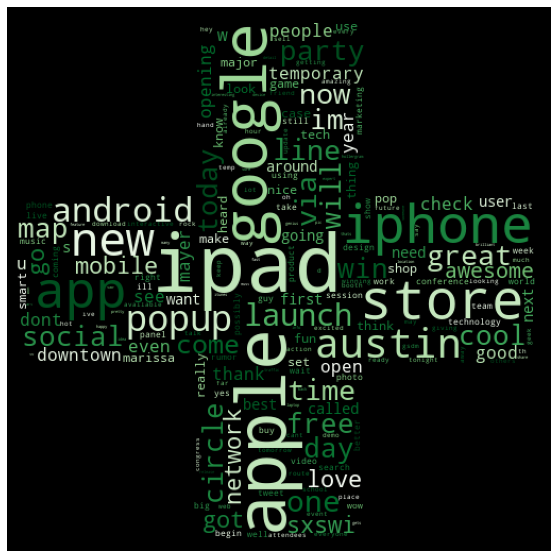

In [45]:
def make_wordcloud(tokens, colormap, mask = None): #Defining function to make word clouds
    
    plt.figure(figsize = (22, 10)) #Instantiate plot and set figure size
    
    wc = WordCloud(max_words = 200, stopwords = None, collocations = False, mask = mask, width = 2200, 
                  height = 1000, colormap = colormap).generate(" ".join(tokens)) #Instantiate word cloud
    
    plt.imshow(wc) #Show word cloud
    
    plt.axis('off') #Turn off xy axis
    
mask = np.array(Image.open('Images/Positive.jpeg')) #Setting mask to image shape
make_wordcloud(tokens_pos, 'Greens', mask = mask) #Plotting word cloud of positive tokens

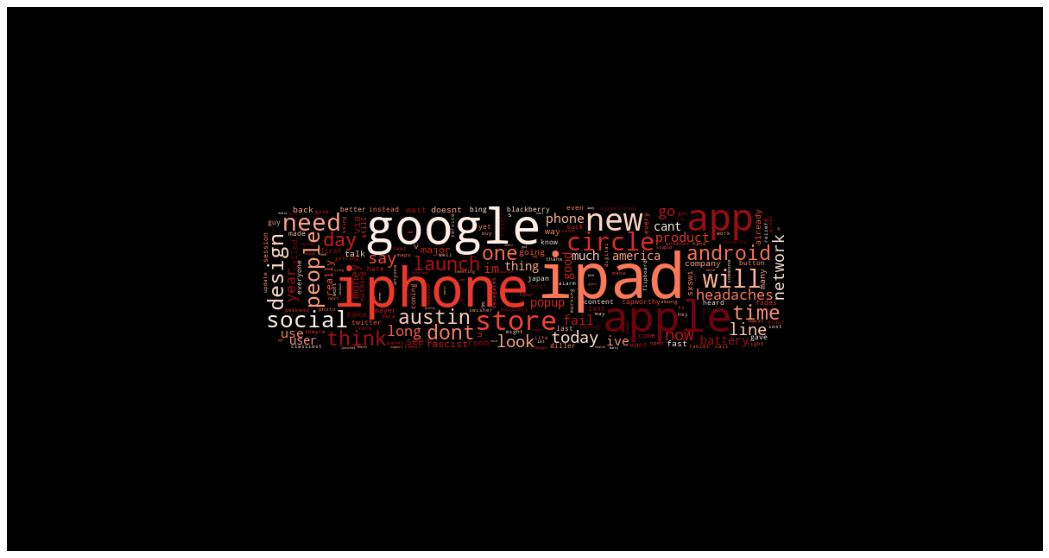

In [46]:
mask = np.array(Image.open('Images/Negative.png')) #Setting mask to image shape
make_wordcloud(tokens_neg, 'Reds', mask = mask) #Plotting word cloud of negative tokens

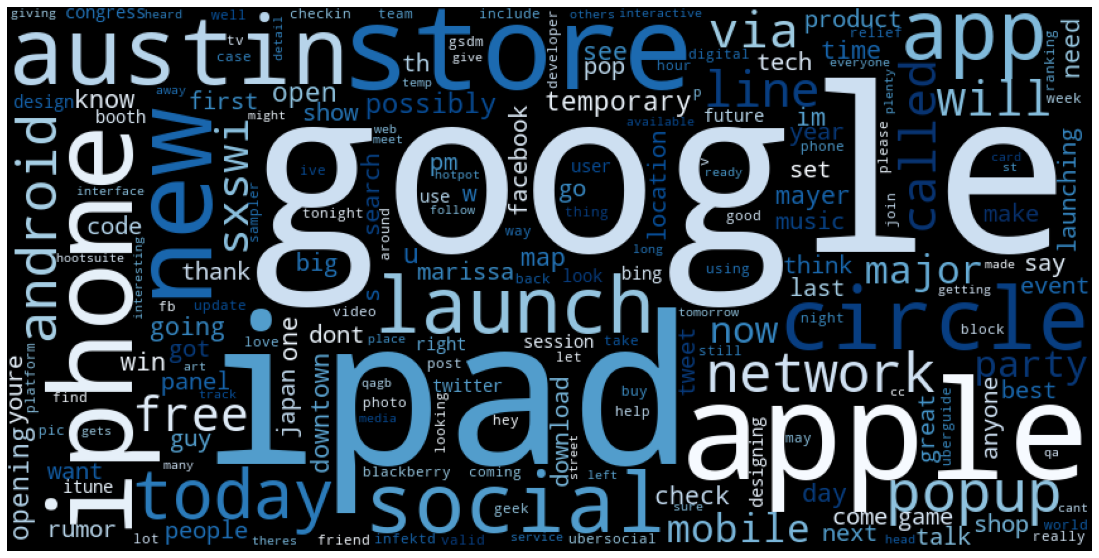

In [47]:
mask = np.array(Image.open('Images/Neutral.png')) #Setting mask to image shape
make_wordcloud(tokens_neu, 'Blues', mask = mask) #Plotting word cloud of neutral tokens

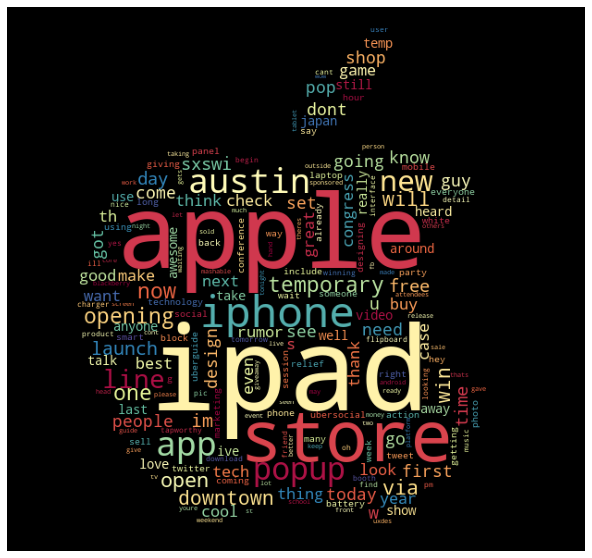

In [48]:
mask = np.array(Image.open('Images/Apple Logo.png')) #Setting mask to image shape
make_wordcloud(tokens_app, 'Spectral', mask = mask) #Plotting word cloud of apple tokens

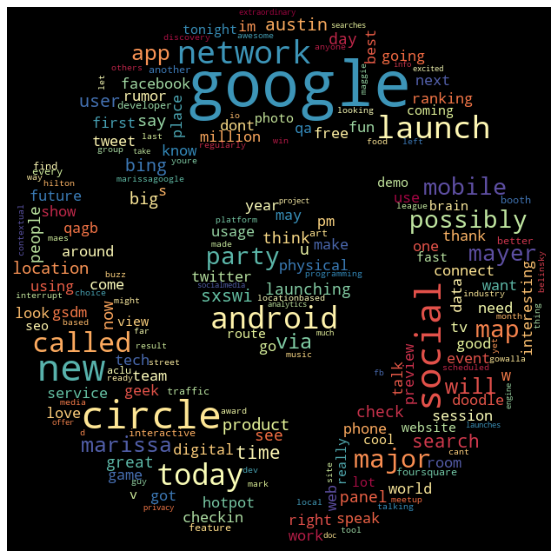

In [49]:
mask = np.array(Image.open('Images/Google Logo.jpeg')) #Setting mask to image shape
make_wordcloud(tokens_goo, 'Spectral', mask = mask) #Plotting word cloud of google tokens

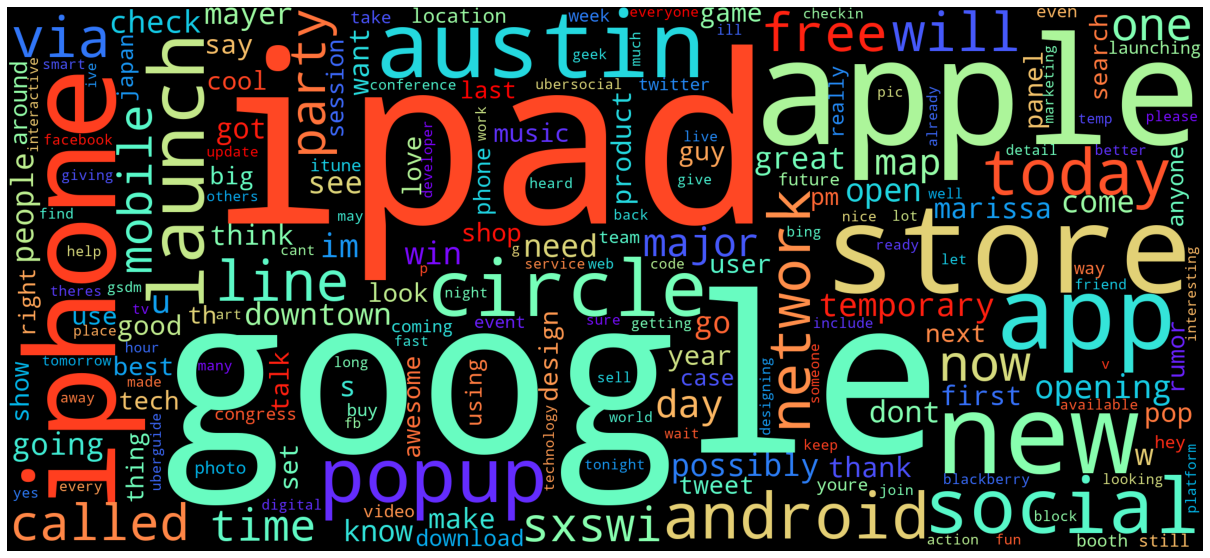

In [50]:
make_wordcloud(tokens, 'rainbow', mask = None) #Plotting word cloud of all tokens

## Ngrams

Here we'll take a look at common phrases within our dataset.

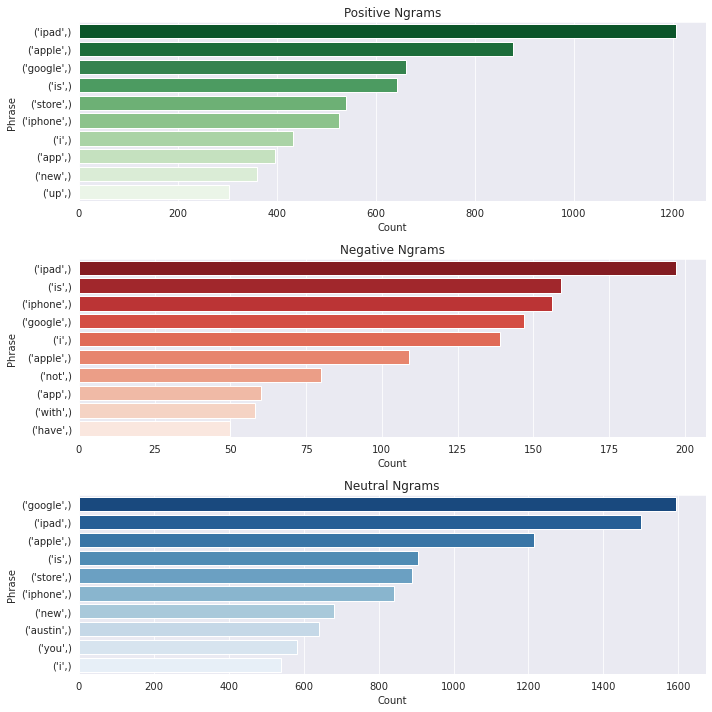

In [51]:
def make_ngram(i, tokens_pos = tokens_pos, tokens_neg = tokens_neg, tokens_neu = tokens_neu): #Defining function
    
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10] #Setting up positive ngram
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10] #Setting up negative ngram
    n_gram_neu = (pd.Series(nltk.ngrams(tokens_neu, i)).value_counts())[:10] #Setting up neutral ngram
    
    n_gram_df_pos = pd.DataFrame(n_gram_pos) #Creating positive ngram dataframe
    n_gram_df_neg = pd.DataFrame(n_gram_neg) #Creating negative ngram dataframe
    n_gram_df_neu = pd.DataFrame(n_gram_neu) #Creating neutral ngram dataframe
    
    n_gram_df_pos = n_gram_df_pos.reset_index() #Resetting index
    n_gram_df_neg = n_gram_df_neg.reset_index() #Resetting index
    n_gram_df_neu = n_gram_df_neu.reset_index() #Resetting index
    
    n_gram_df_pos = n_gram_df_pos.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming positive plot
    n_gram_df_neg = n_gram_df_neg.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming negative plot
    n_gram_df_neu = n_gram_df_neu.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming neutral plot
    
    with sns.axes_style('darkgrid'): #Setting seaborn to darkgrid style
        
        fig = plt.figure(figsize = (10, 10)) #Setting figsize
        ax1 = fig.add_subplot(311) #Stacking first figure
        ax2 = fig.add_subplot(312) #Stacking second figure
        ax3 = fig.add_subplot(313) #Stacking third figure
        
        sns.barplot(ax = ax1, x = 'Count', y = 'Phrase', data = n_gram_df_pos, 
                    palette = 'Greens_r').set(title = 'Positive Ngrams') #Assigning barplot to positive ngrams
        sns.barplot(ax = ax2, x = 'Count', y = 'Phrase', data = n_gram_df_neg, 
                   palette = 'Reds_r').set(title = 'Negative Ngrams') #Assigning barplot to negative ngrams
        sns.barplot(ax = ax3, x = 'Count', y = 'Phrase', data = n_gram_df_neu, 
                   palette = 'Blues_r').set(title = 'Neutral Ngrams') #Assigning barplot to neutral ngrams
        
    plt.tight_layout() #Make plot layouts tight

make_ngram(1) #Plot 1 word ngrams

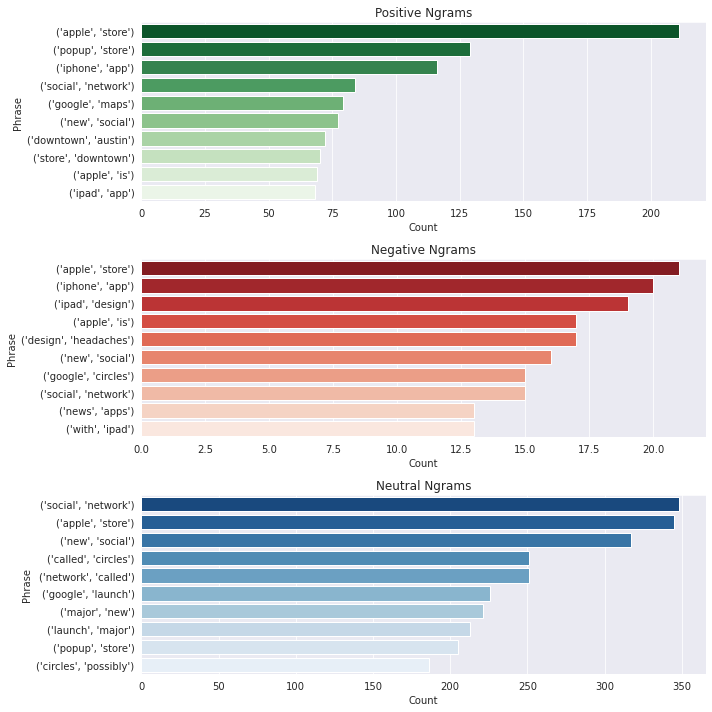

In [52]:
make_ngram(2) #Plot 2 word ngrams

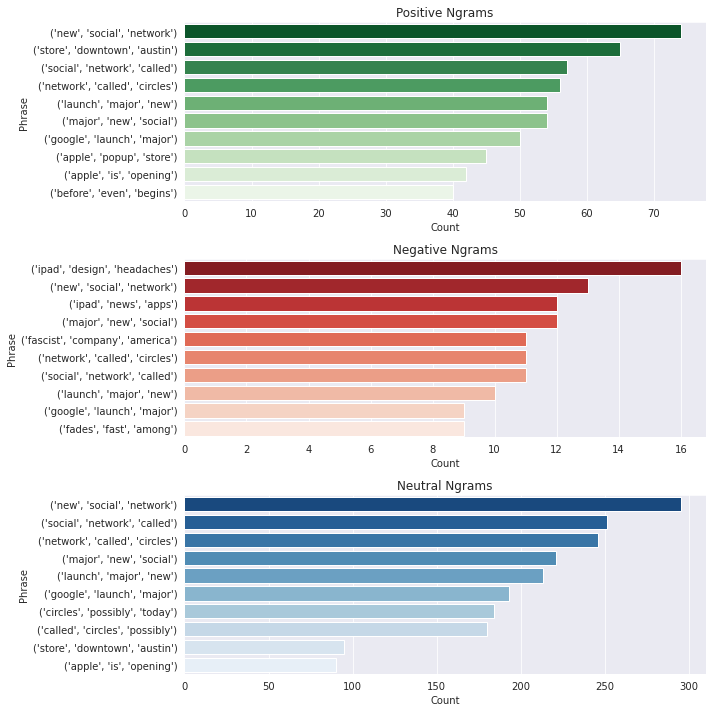

In [53]:
make_ngram(3) #Plot 3 word ngrams

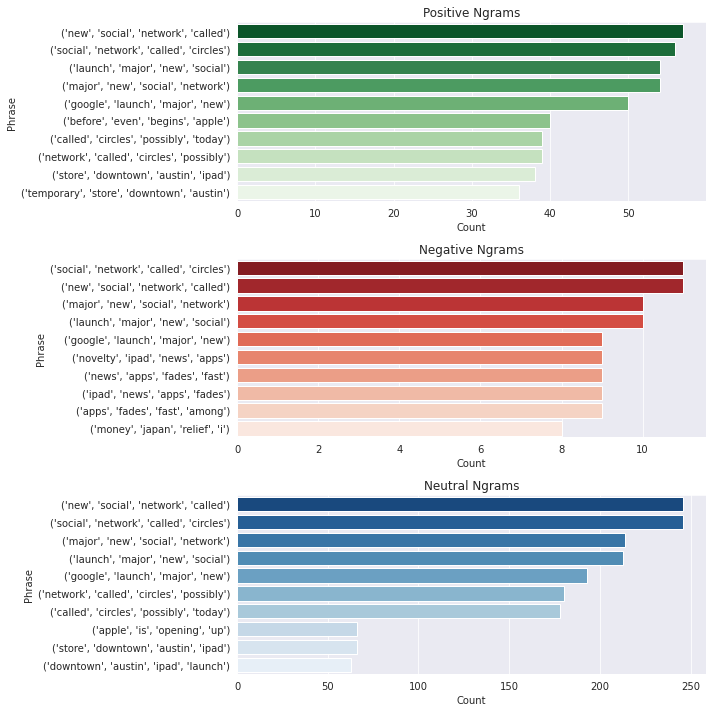

In [54]:
make_ngram(4) #Plot 4 word ngrams

Part of the reason I wanted to look at ngrams was because individually, the most common tokens were quite similar across sentiments, and looking at phrases might help separate them. However, after looking at one to four ngrams for each sentiment, a lot of them are very similar. Usually getting to four ngrams should highlight more differences, however in this instance we're seeing that all three sentiments have many of the same phrases, such as, "new social network called" and "google launch major new". Although this was slightly informative, it wasn't exactly helpful.


## Mutual Information Scores

Let's take a look at the association between two tokens by checking their mutual information scores. 

In [55]:
def calc_bigram(tokens, filter_count): #Defining function to show and calculate mutual information scores
    
    bigram_measures = nltk.collocations.BigramAssocMeasures() #Instantiating Bigram Association Measures
    
    tokens_pmi_finder = BigramCollocationFinder.from_words(tokens) #Instantiating Bigram Collocation Finder
    
    tokens_pmi_finder.apply_freq_filter(filter_count) #Setting minimum amount of times bigram must appear
    
    tokens_pmi_scored = tokens_pmi_finder.score_ngrams(bigram_measures.pmi) #Scoring tokens from bigrams
    
    return tokens_pmi_scored #Show scores

calc_bigram(tokens, 100)

[(('marissa', 'mayer'), 8.801476589041433),
 (('network', 'called'), 7.66456578521278),
 (('possibly', 'today'), 7.5006950000919375),
 (('social', 'network'), 7.292460255591923),
 (('circles', 'possibly'), 7.259686900588147),
 (('launch', 'major'), 7.221141755499211),
 (('check', 'out'), 7.144484025439436),
 (('called', 'circles'), 7.1340510685139975),
 (('popup', 'shop'), 7.090796976414595),
 (('pop', 'up'), 6.944069497332507),
 (('major', 'new'), 6.52821208699282),
 (('downtown', 'austin'), 6.513826559135513),
 (('new', 'social'), 5.930674893501045),
 (('up', 'temporary'), 5.906171340862674),
 (('opening', 'up'), 5.782059735864149),
 (('store', 'downtown'), 5.746030672372765),
 (('temporary', 'store'), 5.68161002679733),
 (('popup', 'store'), 5.235218526782607),
 (('google', 'maps'), 5.039248083702937),
 (('is', 'opening'), 5.0073245631673196),
 (('google', 'launch'), 4.316901693953017),
 (('apple', 'store'), 4.2013758639688135),
 (('iphone', 'app'), 4.186770556087101),
 (('store', '

These are all logical bigrams, such as "iphone app" and "possibly today". Again, these are bigrams that are used over 100 times as well as their mutual information scores. Let's look at bigrams within each sentiment.

In [56]:
calc_bigram(tokens_pos, 100)

[(('popup', 'store'), 5.19991828065276),
 (('iphone', 'app'), 4.28176049532691),
 (('apple', 'store'), 3.9582615716922476)]

In [57]:
calc_bigram(tokens_neg, 100)

[]

In [58]:
calc_bigram(tokens_neu, 100)

[(('network', 'called'), 7.285105378132055),
 (('possibly', 'today'), 7.1242277543720895),
 (('launch', 'major'), 6.968352907663178),
 (('social', 'network'), 6.942469523996856),
 (('circles', 'possibly'), 6.894864477280745),
 (('called', 'circles'), 6.7680959057519345),
 (('major', 'new'), 6.4701359058186405),
 (('downtown', 'austin'), 6.357700536336839),
 (('new', 'social'), 5.870149336541878),
 (('store', 'downtown'), 5.675311979773863),
 (('temporary', 'store'), 5.637686907473949),
 (('popup', 'store'), 5.184130595590727),
 (('apple', 'store'), 4.288275291444794),
 (('google', 'launch'), 4.223646620384823),
 (('store', 'austin'), 3.8889072484318348),
 (('google', 'circles'), 3.530151809017692),
 (('ipad', 'launch'), 3.148462906863493),
 (('apple', 'is'), 2.6759546751031777)]

We're seeing some crossover between positive and neutral bigrams, like "apple store" and "popup store", but in general there aren't that many repeating bigrams within the positive group. There are no negative repeating bigrams. I tried a few different values for "filter_count" and even went all the way down to 50, but there were still no bigrams so I decided to stick with 100. Let's also keep in mind that I removed the word "sxsw" prior to this because it was common within each sentiment.

Our exploratory data analysis provided us with a lot of information. While we didn't outright ask any questions to be answered through analysis, our EDA answered some unasked questions anyway, such as:

* What are the most common hashtags overall? Within emotions? Within brands?
* What percent of the tweet text data was removed after cleaning?
* How does the character count differ between emotions? Between brands?
* How does the token count differ between emotions? Between brands?
* What are the most used terms within each emotion? Brand?
* What are the most common one, two, three, and four-word phrases tweeted within each emotion?

While not every avenue we went down gave us helpful information, it did provide us with more pieces to the puzzle and allowed us to get a better idea of the spread of this dataset. 

That is all for this notebook and the EDA. Now we can move on to the next notebook for modeling.